In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Churn.csv')
data

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [5]:
#Dealing with categorical variables
from sklearn.preprocessing import OrdinalEncoder
#Finidng all the columns with object dtype data
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

ordinal_encoder = OrdinalEncoder()
data[object_cols] = ordinal_encoder.fit_transform(data[object_cols])

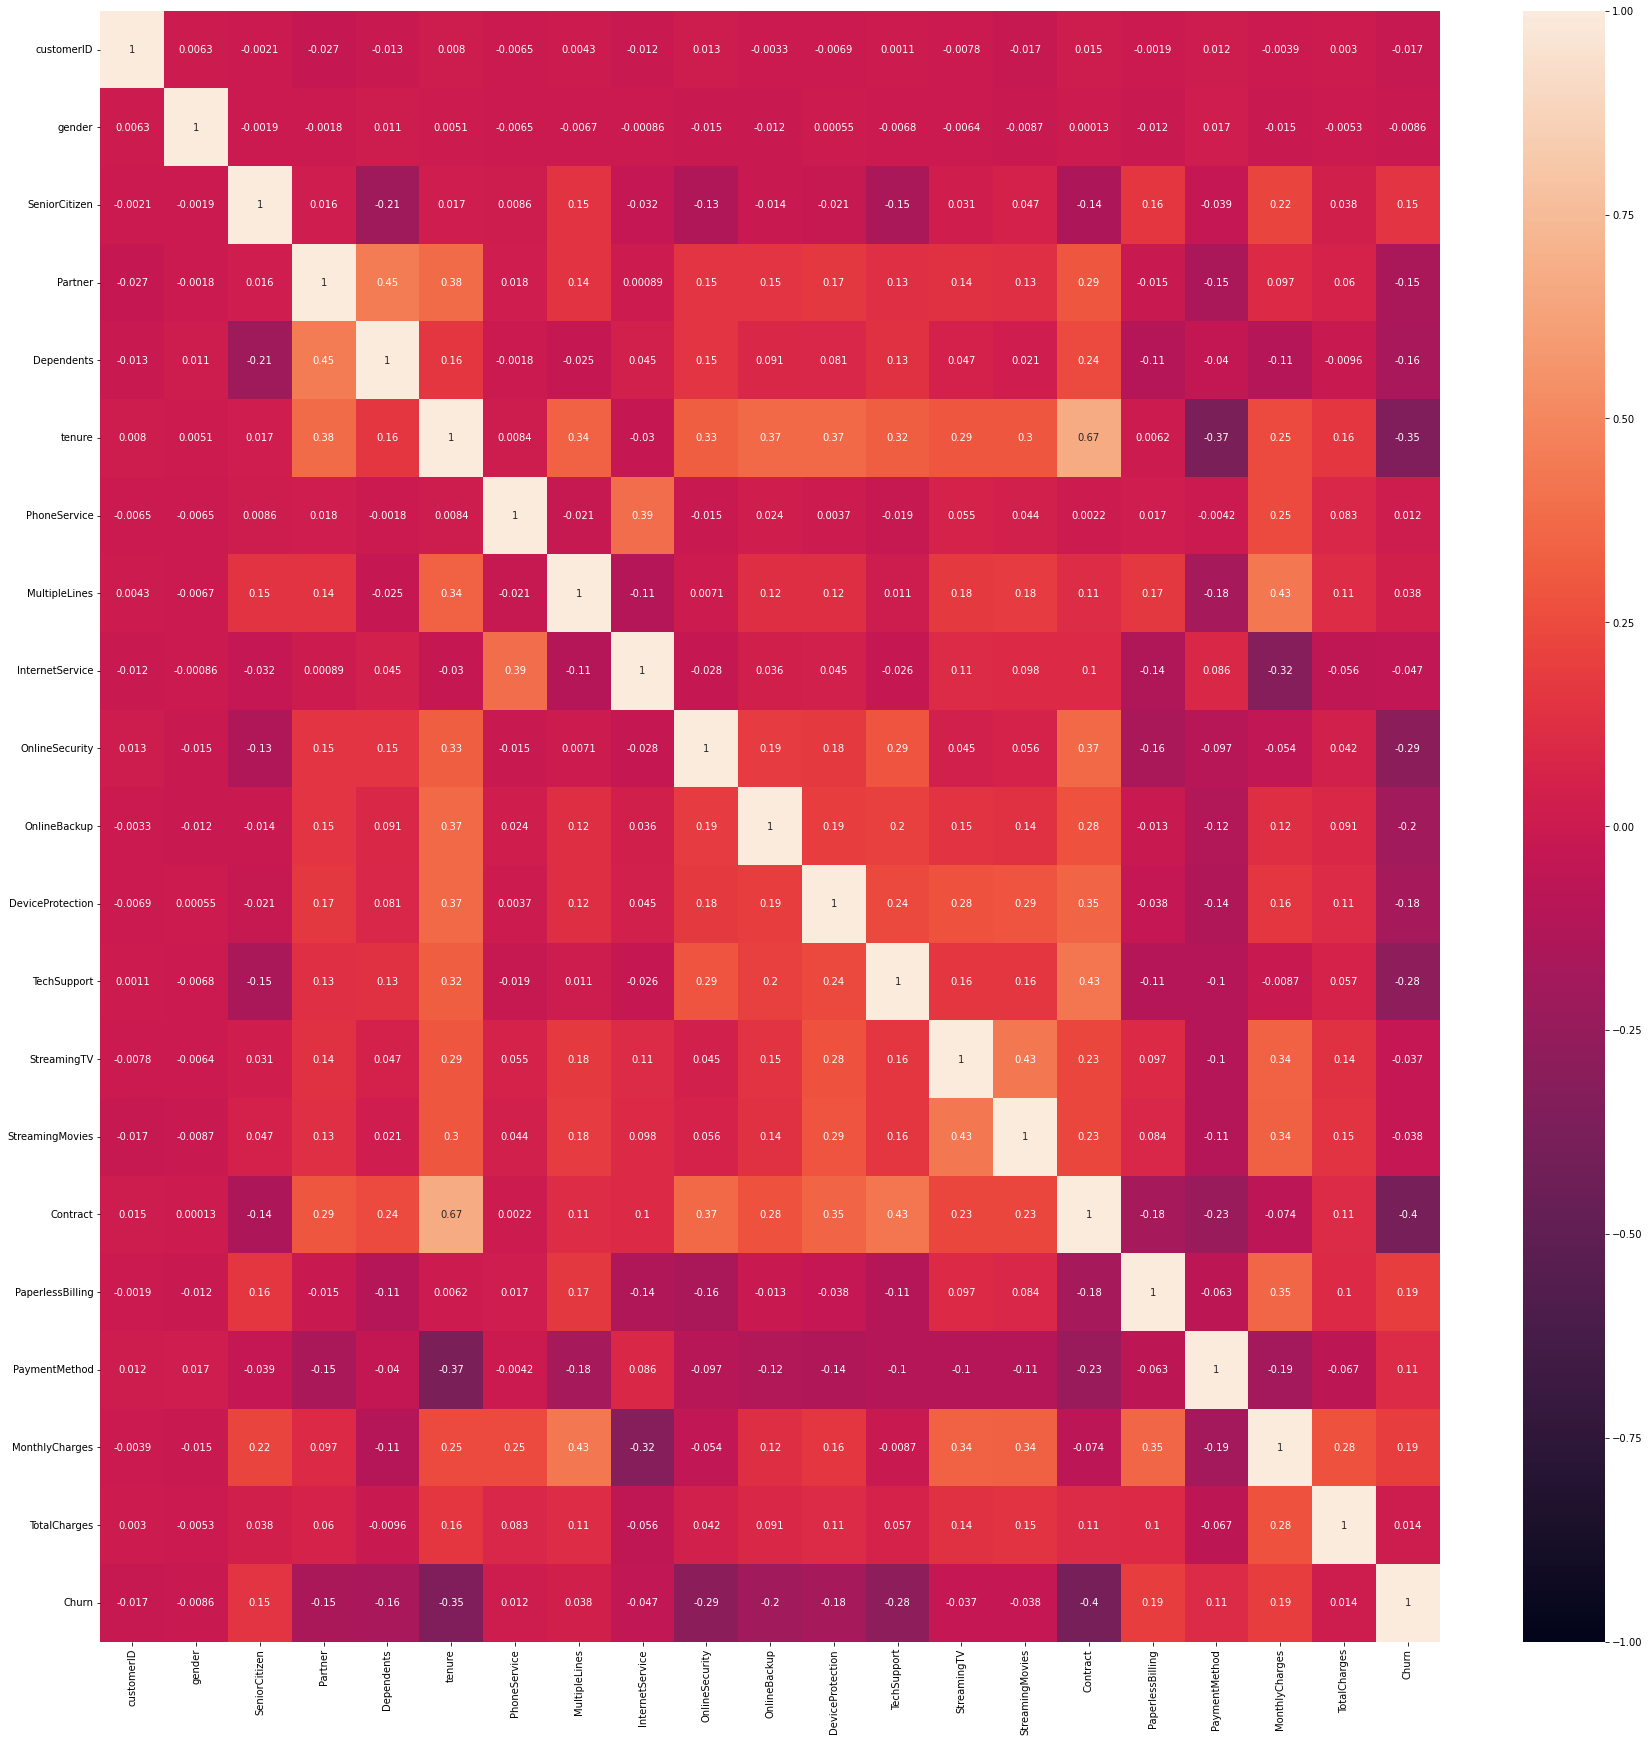

In [6]:
#Analyzing the correlation between data
correlation = data.corr()
fig, ax = plt.subplots(figsize=(30,30)) 
heatmap = sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)


In [7]:
data.corr()

customerID    gender  SeniorCitizen   Partner  Dependents  \
customerID          1.000000  0.006288      -0.002074 -0.026729   -0.012823   
gender              0.006288  1.000000      -0.001874 -0.001808    0.010517   
SeniorCitizen      -0.002074 -0.001874       1.000000  0.016479   -0.211185   
Partner            -0.026729 -0.001808       0.016479  1.000000    0.452676   
Dependents         -0.012823  0.010517      -0.211185  0.452676    1.000000   
tenure              0.008035  0.005106       0.016567  0.379697    0.159712   
PhoneService       -0.006483 -0.006488       0.008576  0.017706   -0.001762   
MultipleLines       0.004316 -0.006739       0.146185  0.142410   -0.024991   
InternetService    -0.012407 -0.000863      -0.032310  0.000891    0.044590   
OnlineSecurity      0.013292 -0.015017      -0.128221  0.150828    0.152166   
OnlineBackup       -0.003334 -0.012057      -0.013632  0.153130    0.091015   
DeviceProtection   -0.006918  0.000549      -0.021398  0.166330    0.080537   
TechSupport         0.001140 -0.006825      -0.151268  0.126733    0.133524   
StreamingTV        -0.007777 -0.006421       0.030776  0.137341    0.046885   
StreamingMovies    -0.016746 -0.008743       0.047266  0.129574    0.021321   
Contract            0.015028  0.000126      -0.142554  0.294806    0.243187   
PaperlessBilling   -0.001945 -0.011754       0.156530 -0.014877   -0.111377   
PaymentMethod       0.011604  0.017352      -0.038551 -0.154798   -0.040292   
MonthlyCharges     -0.003916 -0.014569       0.220173  0.096848   -0.113890   
TotalCharges        0.003027 -0.005291       0.037653  0.059568   -0.009572   
Churn              -0.017447 -0.008612       0.150889 -0.150448   -0.164221   

                    tenure  PhoneService  MultipleLines  InternetService  \
customerID        0.008035     -0.006483       0.004316        -0.012407   
gender            0.005106     -0.006488      -0.006739        -0.000863   
SeniorCitizen     0.016567      0.008576       0.146185        -0.032310   
Partner           0.379697      0.017706       0.142410         0.000891   
Dependents        0.159712     -0.001762      -0.024991         0.044590   
tenure            1.000000      0.008448       0.343032        -0.030359   
PhoneService      0.008448      1.000000      -0.020538         0.387436   
MultipleLines     0.343032     -0.020538       1.000000        -0.109216   
InternetService  -0.030359      0.387436      -0.109216         1.000000   
OnlineSecurity    0.325468     -0.015198       0.007141        -0.028416   
OnlineBackup      0.370876      0.024105       0.117327         0.036138   
DeviceProtection  0.371105      0.003727       0.122318         0.044944   
TechSupport       0.322942     -0.019158       0.011466        -0.026047   
StreamingTV       0.289373      0.055353       0.175059         0.107417   
StreamingMovies   0.296866      0.043870       0.180957         0.098350   
Contract          0.671607      0.002247       0.110842         0.099721   
PaperlessBilling  0.006152      0.016505       0.165146        -0.138625   
PaymentMethod    -0.370436     -0.004184      -0.176793         0.086140   
MonthlyCharges    0.247900      0.247398       0.433576        -0.323260   
TotalCharges      0.158523      0.083195       0.114955        -0.055724   
Churn            -0.352229      0.011942       0.038037        -0.047291   

                  OnlineSecurity  ...  DeviceProtection  TechSupport  \
customerID              0.013292  ...         -0.006918     0.001140   
gender                 -0.015017  ...          0.000549    -0.006825   
SeniorCitizen          -0.128221  ...         -0.021398    -0.151268   
Partner                 0.150828  ...          0.166330     0.126733   
Dependents              0.152166  ...          0.080537     0.133524   
tenure                  0.325468  ...          0.371105     0.322942   
PhoneService           -0.015198  ...          0.003727    -0.019158   
MultipleLines           0.0071

In [8]:
#Splitting the dataset into train and test
x = data.drop(['Churn'], axis = 1)
y = data.Churn
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [9]:
print(x_train.info(), '\n')
print(x_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 1814 to 5157
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   float64
 1   gender            5634 non-null   float64
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   float64
 4   Dependents        5634 non-null   float64
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   float64
 7   MultipleLines     5634 non-null   float64
 8   InternetService   5634 non-null   float64
 9   OnlineSecurity    5634 non-null   float64
 10  OnlineBackup      5634 non-null   float64
 11  DeviceProtection  5634 non-null   float64
 12  TechSupport       5634 non-null   float64
 13  StreamingTV       5634 non-null   float64
 14  StreamingMovies   5634 non-null   float64
 15  Contract          5634 non-null   float64
 16  PaperlessBilling  5634 non-null   float

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)

In [11]:
model.fit(x_train, y_train)

C:\Users\balam\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [12]:
pred = model.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.794180269694819